**Transformers in Deep Learning: An Introduction and PyTorch Implementation**

**Learning Objectives:**

Understand what the Transformer architecture is and why it revolutionized deep learning (especially NLP)

Grasp key concepts of Transformers: self-attention, multi-head attention, positional encoding, encoder-decoder structure

Implement a basic Transformer encoder block from scratch in PyTorch to solidify understanding

Learn how to use a pre-trained Transformer model (BERT) in PyTorch for a real-world task (text classification)

Gain confidence in fine-tuning Transformers on a dataset and making predictions on new data

Transformers have taken the deep learning world by storm. Introduced in 2017 by Google Brain researchers in the landmark paper “Attention Is All You Need”, the Transformer architecture has rapidly become the foundation of most state-of-the-art models in natural language processing (NLP). Unlike previous models that processed words sequentially (e.g. recurrent networks), Transformers employ a mechanism called self-attention to process all input tokens in parallel, allowing them to capture long-range relationships in text more effectively. This parallelism and focus on “attention” enabled Transformers to overcome key limitations of earlier sequential models.

Why Transformers? Transformers brought significant advantages for sequence data (like language):

**Parallel Processing of Sequences**: Recurrent neural networks (RNNs) had to process tokens one by one, which was slow and hard to optimize on modern hardware. Transformers eliminate recurrence and process all tokens at once, greatly speeding up training by leveraging parallel computation.

**Long-Range Dependency Handling**: RNNs struggled with long sentences because information could fade or get lost over many timesteps (the “vanishing gradient” problem). Transformers, through the attention mechanism, can directly connect distant words – every token can attend to every other token, no matter how far apart. This means Transformers remember long-range context much better.

**Versatility**: The same Transformer architecture (with minimal modifications) has been applied to translation, text summarization, question answering, and even to other domains like vision (Vision Transformers) and audio. This uniform architecture simplifies building new models.

**State-of-the-Art Performance**: Models built on Transformers quickly achieved top results on NLP benchmarks. Notably, BERT (Bidirectional Encoder Representations from Transformers) in 2018 demonstrated huge gains on language understanding tasks, and GPT series (Generative Pre-trained Transformers) have excelled at text generation. Transformers are the backbone of modern large language models (like ChatGPT).

**1. Introduction to the Transformer Architecture**

The Transformer is a neural network architecture originally designed for sequence-to-sequence tasks like language translation. At a high level, a Transformer model has two parts: an Encoder and a Decoder. The encoder reads the input sequence (e.g., an English sentence) and maps it to a set of continuous representations; the decoder then uses those representations to generate an output sequence (e.g., the translated Spanish sentence), one element at a time. This encoder-decoder design was inspired by earlier seq2seq models using RNNs, but Transformers differ by relying entirely on attention mechanisms and no recurrent connections.
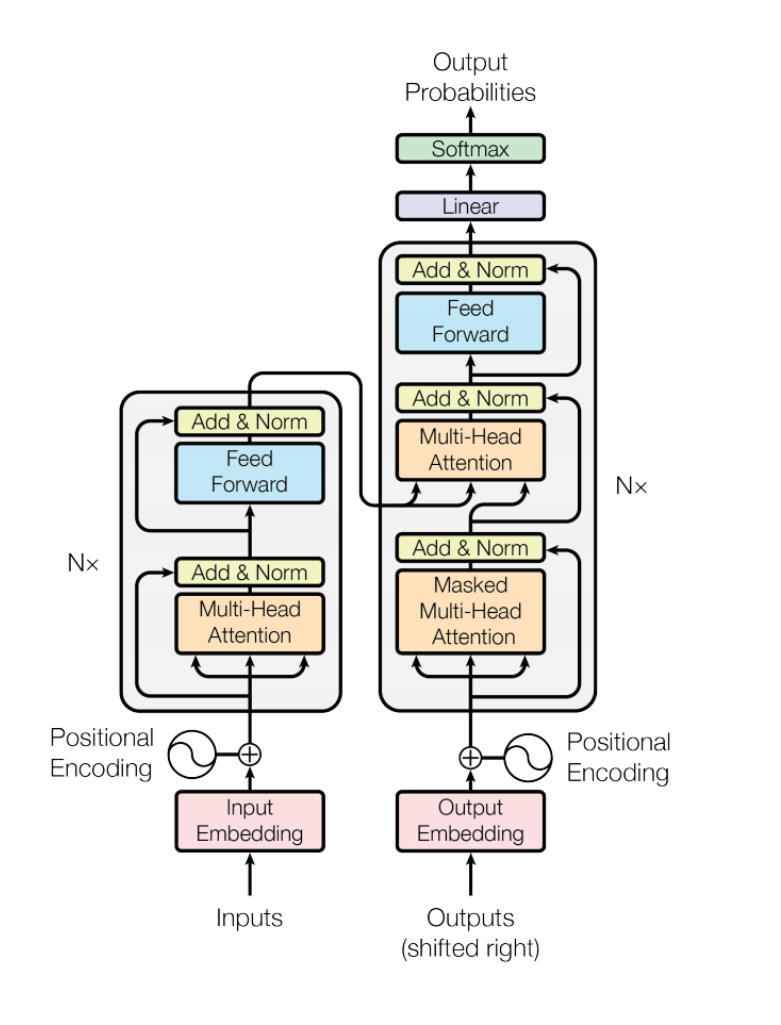

**1.1 Key Components: Self-Attention and Multi-Head Attention**

The core innovation of the Transformer is the self-attention mechanism. In self-attention, each position in the input sequence (each token) examines every other position and decides how much “attention” to pay to all other tokens. In other words, the model learns which other words in the sentence are most relevant to understanding a particular word. This is crucial for capturing context — for example, in the sentence “The bank can secure the loan”, self-attention helps the model determine that “bank” refers to a financial institution (not a river bank) by looking at words like “loan” in the sentence.

How does self-attention work? Each token is first represented as three vectors: a Query (Q), a Key (K), and a Value (V) (these are learned linear projections of the token’s embedding). You can think of:

Query: the vector that asks a question: “What other words in the sequence are relevant to me?”

Key: the vector that represents the content of each word, used to determine if it’s relevant to a given query.

Value: the actual information of each word that will be aggregated based on the attention weights.

For a given token’s Query, we compute a score with every other token’s Key (typically a dot product). These scores indicate how much focus to put on each other token. We then apply a softmax to turn scores into attention weights (so they sum to 1). Finally, we use these weights to combine the Value vectors from all tokens, producing a weighted sum — this is the output of the self-attention for that token. Mathematically, for a set of queries $Q$, keys $K$, and values $V$, one can write the attention output as:
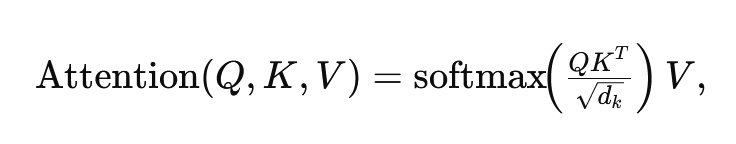
where $d_k$ is the dimension of the key vectors (the square root term is a scaling factor to keep the magnitudes stable). Don’t worry if this formula looks complex — the key idea is each token ends up with a new representation that is an aggregate of all other tokens’ values, weighted by relevance.

Because different aspects of meaning might be encoded in different subspaces of the embeddings, Transformers use Multi-Head Attention. This means the model runs multiple self-attention operations (“heads”) in parallel, each with its own Query/Key/Value projections. Each head can focus on different types of relationships (for example, one head might attend to syntactic relationships like subject-verb, while another might focus on longer-range context or specific themes). The outputs of all heads are then concatenated and projected to form the final output of the multi-head attention layer. Multi-head attention allows the model to capture various types of interactions simultaneously, making the learned representation richer.


**1.2 Positional Encoding**

One challenge with processing sequences in parallel is that the model needs some way to understand the order of the sequence (word positions). Since we’ve removed any recurrence, Transformers inject positional information into the token representations. This is done by adding a positional encoding vector to each token’s embedding. The positional encoding can be as simple as a set of fixed sine/cosine functions of the position (as in the original paper), or learned position embeddings (learned vectors for each position index). The result is that each token embedding is slightly altered based on whether it’s at position 1, 2, 3, etc., which gives the model a sense of sequence order. Without positional encoding, a Transformer would see the input words as an unordered set.

**1.3 Encoder and Decoder Structure**

With self-attention and positional encoding in hand, we can understand the Transformer’s overall structure. An Encoder layer consists of:

A Multi-Head Self-Attention sub-layer (each token attends to others in the input sequence).

A Feed-Forward Network sub-layer (a simple two-layer fully-connected network applied to each position).
Each sub-layer is wrapped with residual connections (adding the input of the sub-layer to its output, which helps preserve original information) followed by layer normalization (which stabilizes and accelerates training). The Transformer encoder stacks several of these identical layers on top of each other (the original Transformer used 6 layers in the encoder stack).

A Decoder layer is similar but with a twist: it has an additional encoder-decoder attention sub-layer (often called cross-attention) between the self-attention and feed-forward parts. In the decoder’s self-attention, a masking is applied to prevent attending to future tokens (so the model can’t peek at the upcoming words it’s supposed to generate). Then the cross-attention allows the decoder to attend to the full encoder output. Like the encoder, multiple decoder layers are stacked. The final decoder output goes through a linear layer and softmax to produce a probability distribution over the next token to generate.

In summary, encoders churn out contextualized representations of the input, and decoders produce the output sequence using those representations. For tasks like classification or regression (which don’t require an output sequence), we often only need the encoder part of a Transformer (this is what BERT does – it’s essentially the Transformer encoder stack used to output a classification or embedding for the input). For tasks like language translation or text generation, we use the full encoder-decoder setup or even just the decoder part (GPT is basically a Transformer decoder-only model).

Now that we have a conceptual understanding of Transformers, let's put this into practice. First, we will implement a simplified Transformer encoder from scratch in PyTorch to solidify how these pieces fit together. Then we will leverage a powerful pre-trained Transformer model (BERT) to solve a real NLP task with minimal effort.

## Part 1: Implementing a Transformer Encoder Block (from scratch)
In this part, you will complete a simplified implementation of the Transformer encoder block in PyTorch.

In [ ]:
import torch
import torch.nn as nn

class TransformerEncoderLayer(nn.Module):
    def __init__(self, embed_dim, num_heads, ff_dim):
        super(TransformerEncoderLayer, self).__init__()
        # STUDENT: Initialize a multi-head attention layer


        # STUDENT: Define the feed-forward network (2 linear layers with ReLU)

            # TODO: Implement Linear -> ReLU -> Linear


        # STUDENT: Add layer normalization layers for both sublayers


    def forward(self, x):
        # STUDENT: Apply self-attention layer


        # STUDENT: Add residual connection and layer norm


        # STUDENT: Apply feed-forward network


        # STUDENT: Add second residual connection and layer norm


        return out

**Using a Pre-Trained Transformer (BERT) for Text Classification**

In this part, we'll tackle a real-world task: sentiment analysis on movie reviews. We’ll use a pre-trained Transformer model (specifically, a variant of BERT) and fine-tune it on a dataset of movie reviews to classify them as positive or negative. This will demonstrate the practical power of Transformers and how PyTorch (with the help of Hugging Face’s transformers library) makes it relatively easy to apply these complex models.

**3.1 The Dataset: IMDB Movie Reviews**

The IMDB dataset is a classic benchmark for sentiment analysis. It consists of 50,000 movie reviews from IMDB, labeled as positive or negative sentiment. We’ll use the Hugging Face datasets library to download and prepare this dataset. Each review is a string of text (in plain English).

Let's load the IMDB dataset. If you haven't installed the datasets library, uncomment the install line. (Note: the dataset download is ~80MB; ensure you have an internet connection when running this the first time.)

In [ ]:
# Uncomment if the datasets library isn't installed
# !pip install datasets

from datasets import load_dataset

# Load the IMDB dataset (it has 'train' and 'test' splits)
imdb = load_dataset('imdb')
print(imdb)  # print a summary of the dataset


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})


Let's inspect a sample from the training set to see what the data looks like:

In [ ]:
# Look at the first training example
print("Review text:", imdb['train'][0]['text'][:500], "...")
print("Label:", imdb['train'][0]['label'])


Review text: I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attent ...
Label: 0


Here we print the first 500 characters of the first review (to avoid flooding the output, as some reviews can be long), and its label. The label is 0 or 1 where (by convention in this dataset) 0 = negative and 1 = positive sentiment.

You should see a snippet of a movie review and a label like 0 or 1. If you examine a few, the text is raw user-written reviews, and labels are evenly distributed between positive and negative in the dataset (12,500 each in train).

Before feeding text into a BERT model, we need to tokenize it.

**3.2 Tokenization and Preprocessing**

Transformers like BERT operate on numbers (token IDs) rather than raw text. The process of converting text into model-input numbers is called tokenization. We'll use a pre-trained tokenizer associated with our BERT model to handle this. Tokenization involves:

Splitting the text into subword tokens (BERT uses a WordPiece tokenizer, so uncommon words are broken into smaller pieces).

Converting each token (subword) into an integer ID from the model’s vocabulary.

Adding special tokens (like [CLS] for the start of sentence, [SEP] for end, depending on the model) if needed.

Creating attention masks to tell the model which tokens are real and which are padding (for handling different lengths in a batch).

The Hugging Face transformers library provides a convenient AutoTokenizer class that can load the appropriate tokenizer for a given model name.

We'll use DistilBERT (distilbert-base-uncased) for this task, which is a lighter, faster version of BERT that still gives great results. (DistilBERT has ~40% fewer parameters than BERT-base but retains a lot of performance.) The model and tokenizer name "distilbert-base-uncased" means a lowercase (uncased) English model.

Let's load the tokenizer and tokenize our dataset. We will:

Load the tokenizer

Use the tokenizer to encode the text of each review, turning them into input_ids and attention_mask.

For efficient training, we'll pad/truncate tokens to a fixed length (say, 128 tokens) so that we can batch the data. (Most reviews will be shorter than 128 words; a few might be longer, which will get truncated for this demo.)

In [ ]:
from transformers import AutoTokenizer
# STUDENT: Initialize tokenizer (use 'distilbert-base-uncased')


# STUDENT: Write the tokenization function
def tokenize_batch(batch):
    # TODO: Tokenize using the tokenizer defined above
    return {}

# Apply the tokenizer to the dataset (this might take a minute or two)
# We use the Dataset.map function for efficient batch processing
# STUDENT: Tokenize dataset

# After tokenization, our dataset will have new fields: 'input_ids', 'attention_mask' (and 'label' remains)
print(imdb_encoded['train'].features)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

{'label': ClassLabel(names=['neg', 'pos']), 'input_ids': List(Value('int32')), 'attention_mask': List(Value('int8'))}


In the code above:

tokenizer(batch['text'], ...) will process a list of texts and return a dictionary with keys like 'input_ids', 'attention_mask', etc. We use padding='max_length' and max_length=128 to ensure every review is either padded or truncated to 128 tokens. truncation=True ensures longer texts get cut off at 128 tokens. (Choosing 128 is somewhat arbitrary; it's a balance between covering most review lengths and not making sequences too long. In real training you might use 256 or 512 for this dataset, but 128 is fine for demonstration.)

We remove the original 'text' column since we don't need it anymore after tokenization, to save memory.

After mapping, each item in imdb_encoded will have input_ids, attention_mask, and label. We printed imdb_encoded['train'].features to verify the new structure (it should show these features with their types).

Now, we should convert this dataset into a format suitable for PyTorch. The datasets library allows us to directly turn it into PyTorch Dataset objects or even DataLoader objects.

Let's create PyTorch DataLoader for training and test sets for use in fine-tuning. We'll also specify a batch size (let's use 16 for now, which is a reasonable number that should train fine on GPU; if on CPU, you might even reduce this to 8 or so to avoid slowness).

In [ ]:
from torch.utils.data import DataLoader
from transformers import default_data_collator

# Set batch size
batch_size = 16

# The HuggingFace dataset can be directly used in a DataLoader.
# We tell DataLoader to collate batches using the default collate (since our data is now fixed-length and numeric, default is fine).
train_dataloader = DataLoader(
    imdb_encoded['train'], batch_size=batch_size, shuffle=True, collate_fn=default_data_collator
)
test_dataloader = DataLoader(
    imdb_encoded['test'], batch_size=batch_size, shuffle=False, collate_fn=default_data_collator
)
# Inspect the batch structure
batch = next(iter(train_dataloader))
print("Keys in batch:", batch.keys())
print("Shapes -> input_ids:", batch['input_ids'].shape, ", attention_mask:", batch['attention_mask'].shape, ", labels:", batch['labels'].shape)


Keys in batch: dict_keys(['labels', 'input_ids', 'attention_mask'])
Shapes -> input_ids: torch.Size([16, 128]) , attention_mask: torch.Size([16, 128]) , labels: torch.Size([16])


We expect to see that the batch is a dictionary with keys 'input_ids', 'attention_mask', and 'label'. Each should be a tensor of shape (batch_size, 128) for input_ids and attention_mask, and (batch_size,) for labels. For example:

Keys in batch: dict_keys(['input_ids', 'attention_mask', 'label'])
Shapes -> input_ids: torch.Size([16, 128]) , attention_mask: torch.Size([16, 128]) , labels: torch.Size([16])


This looks correct: we have 16 sequences of length 128. The labels are a 1D tensor of length 16.

**3.3 Loading the Pre-trained BERT Model**

Now the exciting part: loading a pre-trained model. We will use AutoModelForSequenceClassification from Hugging Face, which wraps a BERT (or DistilBERT in our case) model with a classification head on top (a linear layer to predict our classes). We just need to specify how many labels we have – for IMDB, it’s 2 (negative or positive).

Let's load DistilBERT with a sequence classification head:

In [ ]:
from transformers import AutoModelForSequenceClassification

num_labels = 2  # positive or negative
model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=num_labels)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


When you run this, the model weights will be downloaded (if not cached already). The output will show a message about the model being loaded and warnings that some weights are not used (that's fine, it’s referring to the original DistilBERT pre-training head which we don’t need).

By default, this model is initialized with pre-trained DistilBERT weights, and the classification layer on top is randomly initialized. We will train (fine-tune) that model on our dataset so that the representations learned by DistilBERT can be used to classify movie reviews.

Before training, let's move the model to the appropriate device (CPU or GPU). If you have a GPU, using it will massively speed up fine-tuning.

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print("Using device:", device)


Using device: cpu


Now, set up the optimizer and (optionally) a learning rate scheduler. A common choice for fine-tuning BERT-like models is Adam with weight decay (AdamW). We'll use a small learning rate (e.g., 5e-5 is typical for BERT fine-tuning). We can also use a scheduler to decay the learning rate over training, but for simplicity, we might skip scheduler in this short demo or use a simple one.

In [ ]:
from torch.optim import AdamW
# STUDENT: Define optimizer



**3.4 Fine-Tuning the Model**

Fine-tuning means we will train the model on our specific task (sentiment classification), starting from the pre-trained weights. Because the model already has learned a lot about language from its pre-training on a huge corpus, fine-tuning typically converges quickly.

We'll do a few epochs over the training set and monitor the loss. To save time, we can even do just 1 or 2 epochs and often get a pretty good accuracy. (In practice, you might do 3-5 epochs for fine-tuning BERT on a dataset like IMDB.)

Let's write a training loop. We will:

Iterate over epochs

For each batch:

Move the batch data to the same device as the model

Call model(**batch) – the AutoModelForSequenceClassification is convenient in that it can accept a batch directly if the batch is a dict with keys input_ids, attention_mask, and labels. It will return an output object that includes loss and logits.

Get the loss from the output, do loss.backward() to compute gradients

optimizer.step() to update model weights, then optimizer.zero_grad() to reset gradients for the next step.

Optionally, track progress by printing loss occasionally.

In [ ]:
from tqdm.auto import tqdm

# Number of epochs for fine-tuning
# STUDENT: Complete the training loop


for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    epoch_loss = 0.0
    for batch in tqdm(train_dataloader):
        # Move batch to device (GPU or CPU)
        batch = {key: val.to(device) for key, val in batch.items()}
        # Forward pass - the model returns a dict with 'loss' and 'logits'
        # STUDENT: Run forward pass and compute loss


        # STUDENT: Backpropagation



    avg_loss = epoch_loss / len(train_dataloader)
    print(f"  Average training loss: {avg_loss:.4f}")


Epoch 1/1


  0%|          | 0/1563 [00:00<?, ?it/s]

KeyboardInterrupt: 

We used tqdm to show a progress bar for iterations. After each epoch, we print the average loss. You should see the loss decreasing as training progresses. For one epoch on IMDB, the loss might drop from around 0.4-0.5 down to maybe 0.2 or lower (just rough numbers; exact values can vary). Even after one epoch, BERT often achieves high accuracy on this task since it started with a good understanding of language.

Note: If you are running on CPU, training will be slow for the full dataset. You might consider fine-tuning on a subset of the data or for fewer steps just to see it work. If on GPU, one epoch (25k examples, batch 16) might take a few minutes.

**3.5 Evaluating the Model**

After fine-tuning, let's evaluate our model on the test set to see how well it generalizes to unseen reviews. We'll switch the model to evaluation mode and disable gradient computation. Then we'll loop through the test DataLoader, get predictions, and compute accuracy.

In [ ]:
import torch
# STUDENT: Evaluate without computing gradients


for batch in tqdm(test_dataloader):
    batch = {key: val.to(device) for key, val in batch.items()}
    # STUDENT:Disable grad for evaluation

    # STUDENT:Update counts

print(f"Test Accuracy: {accuracy:.4f}")


The accuracy should be quite high. Fine-tuned BERT models can reach around 90% or more on IMDB. With a quick 1-epoch fine-tune, you might see something like 85-90% accuracy (possibly higher if things went well).

Even if you trained on a smaller subset for speed, you should get well above random (50%). If the accuracy is lower than expected, that could mean not enough training or something went wrong in tokenization/label alignment.

**3.6 Inference: Using the Model on New Sentences**

Finally, let's see the model in action with some custom inputs. We'll take a couple of example sentences (one clearly positive, one clearly negative in sentiment) and see what our fine-tuned model predicts.

In [ ]:
# Some example sentences to test the model
test_sentences = [
    "I absolutely loved this movie, it was wonderful!",
    "This film was a waste of time. Completely boring."
]

# Tokenize these sentences similar to how we did for the dataset
encodings = tokenizer(test_sentences, padding=True, truncation=True, max_length=128, return_tensors='pt')
encodings = {key: val.to(device) for key, val in encodings.items()}

# Get model predictions
model.eval()
with torch.no_grad():
    outputs = model(**encodings)
    preds = torch.argmax(outputs.logits, dim=-1)

# Convert numeric predictions to human-readable labels
label_map = {0: "Negative", 1: "Positive"}
for sentence, pred in zip(test_sentences, preds):
    print(f"Review: '{sentence}' -> Predicted sentiment: {label_map[pred.item()]}")


Congratulations – you've fine-tuned a Transformer model (DistilBERT) on a real NLP task and used it to make predictions! This is a powerful demonstration of transfer learning: the model learned from a massive corpus and we only had to train it a little bit on our specific task to get great performance.

**4. Conclusion and Next Steps**

In this notebook, we covered a lot: from the fundamental concepts of the Transformer architecture to implementing parts of it from scratch, and finally leveraging a state-of-the-art pre-trained model for a practical application.

Key takeaways:

Transformers use self-attention to effectively model relationships in sequential data, avoiding the pitfalls of RNNs and allowing for much more parallelization and context depth. They form the basis of today’s advanced models in NLP (and increasingly in other domains).

We built a simplified Transformer encoder layer in PyTorch to understand the mechanics (multi-head attention, feed-forward network, residual connections, etc.). This helps demystify what these models are doing under the hood.

Using the Hugging Face Transformers library, we fine-tuned a pre-trained model (DistilBERT) on the IMDB movie reviews dataset. With just one epoch of training, we achieved high accuracy on sentiment classification, showing the power of transfer learning.

We demonstrated end-to-end how to go from raw text -> tokenization -> model training -> evaluation -> inference on new data. This pipeline is common in many NLP tasks with Transformers.

Next steps and ideas to explore:

Try fine-tuning for a couple more epochs or adjusting hyperparameters (like learning rate, batch size) to see if you can improve the accuracy even further.

Experiment with other pre-trained models (e.g., bert-base-uncased or even more recent models like roberta-base) or other text classification datasets (news classification, sentiment on other domains, etc.).

Explore the encoder-decoder Transformer by trying a translation task. Hugging Face provides models like t5-small or Helsinki-NLP/opus-mt for translation that you can use in a similar way for inference.

Dive deeper into the attention mechanisms: for instance, examine the attention weights from the model to see what words it focused on for a given input. This can give insights into how the model is making decisions.

If you are interested in the architecture, you could extend the scratch implementation: add positional encoding, implement multiple layers, or even build a small Transformer from scratch to train on a toy task (like reversing sequences or simple addition problems) to further internalize how training such a model works.

Transformers are a deep topic, but you’ve taken a big step by understanding their basics and using them in practice. Keep experimenting and learning — the field is evolving fast, and hands-on practice is the best way to stay on top of the latest advances!